In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosistest

In [2]:
df = pd.read_csv('listings_limpio.csv', index_col=0)
df

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Chamartín,Private room,59,1,81,0.57,1,149,3
1,Latina,Private room,31,4,33,0.38,2,131,0
2,Arganzuela,Entire home/apt,50,15,0,NaN,6,311,0
3,Centro,Entire home/apt,92,5,14,0.16,1,167,4
4,Arganzuela,Private room,29,2,154,1.09,1,344,5
...,...,...,...,...,...,...,...,...,...
17826,Moncloa - Aravaca,Entire home/apt,80,1,0,NaN,2,364,0
17827,Centro,Entire home/apt,185,1,0,NaN,5,353,0
17828,Salamanca,Entire home/apt,104,4,0,NaN,3,13,0
17829,Ciudad Lineal,Private room,18,2,0,NaN,4,24,0


# EJERCICIO 1

Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

 - La correlación mide tanto la fuerza como la dirección de la relación lineal entre dos variables, el rango es entre -1 y 1. Entonces, si la correlación es negativa, las dos variables están relacionadas de manera inversamente proporcional (una aumenta, otra disminuye). Asimismo, cuanto más cercano al -1, más fuerte es esta relación. Si la correlación es positiva, las dos variables están relacionadas de manera proporcional. Cuando más cercano al 1, más fuerte esta relación. Por último, si la correlación es cercano a 0 ó 0, las variables no estarían relacionadas. 
 
 - La covarianza indica si dos variables varían de forma proporcional. Los valores de covarianza no están estandarizados porque depende de los números que entren dentro de la variable. Por consiguiente, la covarianza puede ir desde infinito negativo hasta infinito positivo. Por lo tanto, el valor de una relación lineal perfecta depende de los datos.

 Por lo tanto, la correlación nos indica si dos datos están relacionados y cuánto. La covarianza, por su parte, solo nos indica si existe tal relación.

# EJERCICIO 2

Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. 
Calculad solo la correlación de Pearson.

In [3]:
df.corr(method='pearson')

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.019882,-0.091573,-0.062514,0.040751,0.146224,-0.073144
minimum_nights,-0.019882,1.000000,-0.039395,-0.062356,-0.019569,0.032940,-0.067963
number_of_reviews,-0.091573,-0.039395,1.000000,0.615141,-0.025244,0.050554,0.558941
reviews_per_month,-0.062514,-0.062356,0.615141,1.000000,0.036139,0.140507,0.717701
calculated_host_listings_count,0.040751,-0.019569,-0.025244,0.036139,1.000000,0.069185,0.056520
availability_365,0.146224,0.032940,0.050554,0.140507,0.069185,1.000000,0.135967
number_of_reviews_ltm,-0.073144,-0.067963,0.558941,0.717701,0.056520,0.135967,1.000000


In [5]:
df.cov()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,16958.117951,-94.182150,-822.580623,-9.094576,147.754858,2659.545009,-127.324190
minimum_nights,-94.182150,1323.212281,-98.851004,-3.439867,-19.819585,167.355122,-33.046660
number_of_reviews,-822.580623,-98.851004,4758.206518,72.876460,-48.482923,487.052217,515.382252
reviews_per_month,-9.094576,-3.439867,72.876460,2.480472,1.602510,30.134535,16.566042
calculated_host_listings_count,147.754858,-19.819585,-48.482923,1.602510,775.224071,269.044690,21.035612
availability_365,2659.545009,167.355122,487.052217,30.134535,269.044690,19507.300405,253.847955
number_of_reviews_ltm,-127.324190,-33.046660,515.382252,16.566042,21.035612,253.847955,178.683118


 - En el conjunto de las variables podemos decir que están muy poco correlacionada con el resto, al ser cercano el coeficiente de Pearson a 0 en todas ellas. 
 - La excepción la encontramos en la relación entre number_of_reviews_ltm y reviews_per_month, donde el coeficiente (0.71) es muy cercano a 1, lo que nos indica que son proporcionales.
 - En la covarianza solo vemos la relación positiva o negativa entre las variables, coincidiendo además con lo explicado anteriormente.

# EJERCICIO 3

Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

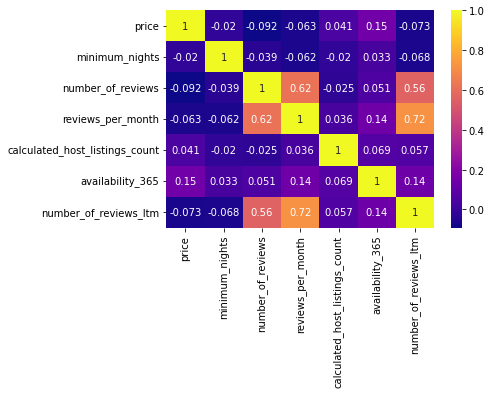

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='plasma');

# EJERCICIO 4

Guardad la gráfica del heatmap.


In [11]:
plt.savefig('heatmap.png', format='png')

<Figure size 432x288 with 0 Axes>